In [1]:
!pip install eli5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cirrhosis.csv"
)

In [4]:
# Viewing data in the file
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# checking if the any data is missing
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
# Replacing categorical data with mode
for column in ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Replacing numerical data with mean or median
for column in ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']:
    # Check if the distribution is skewed
    if data[column].skew() > 1 or data[column].skew() < -1:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
    else:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

data.to_csv('cleaned_data_cirrhosis.csv', index=False)

In [7]:
# Reading the cleaning dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cleaned_data_cirrhosis.csv"
)

In [8]:
# Viewing data
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
# checking if the any data is missing
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

<Figure size 800x500 with 0 Axes>

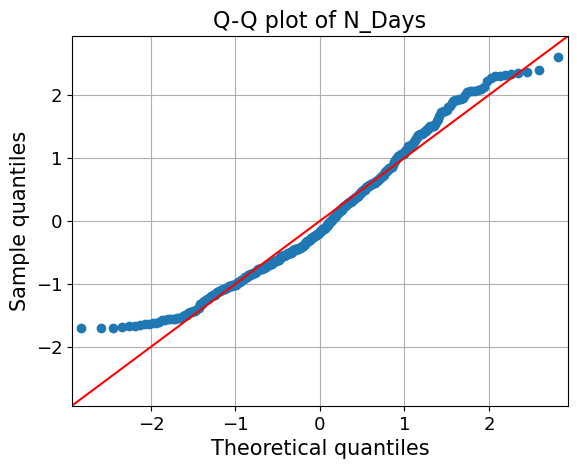

<Figure size 800x500 with 0 Axes>

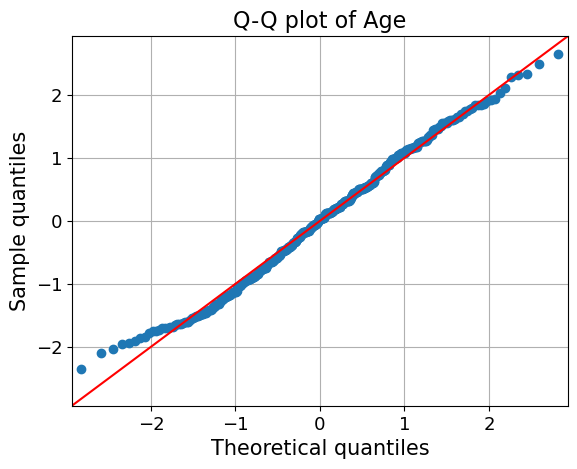

<Figure size 800x500 with 0 Axes>

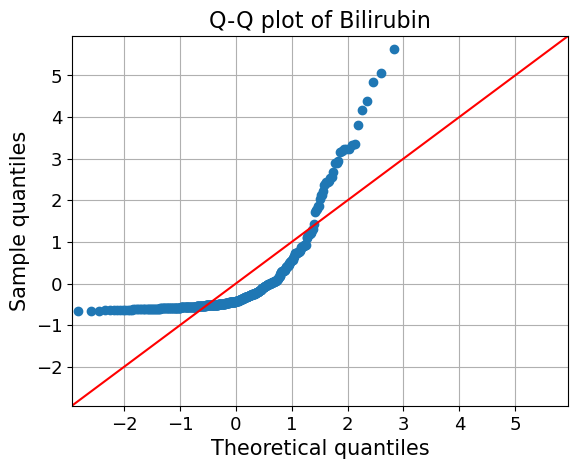

<Figure size 800x500 with 0 Axes>

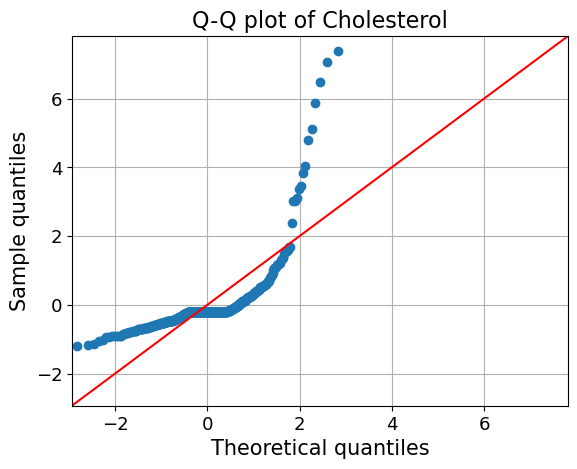

<Figure size 800x500 with 0 Axes>

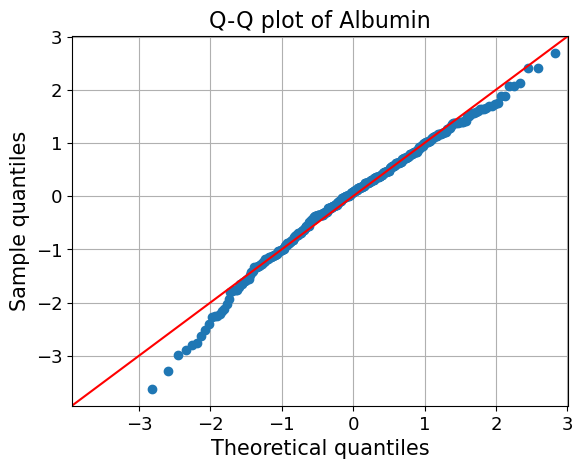

<Figure size 800x500 with 0 Axes>

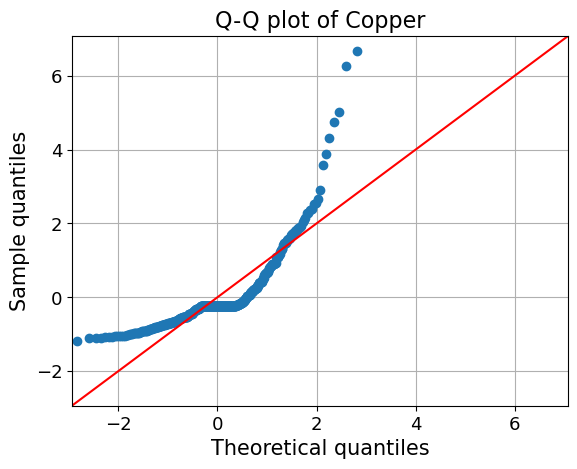

<Figure size 800x500 with 0 Axes>

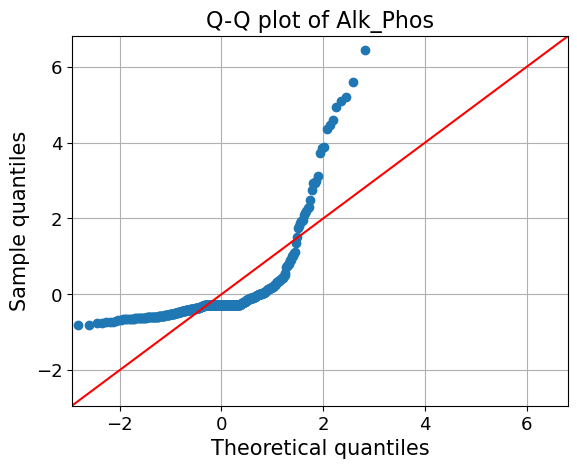

<Figure size 800x500 with 0 Axes>

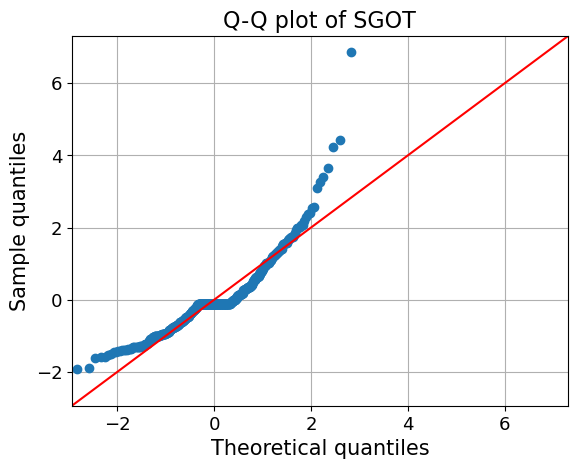

<Figure size 800x500 with 0 Axes>

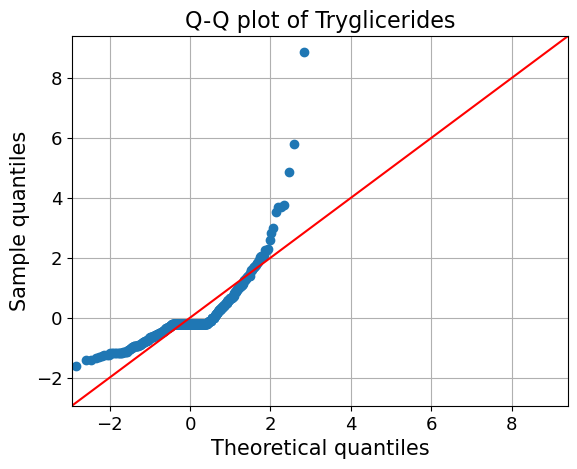

<Figure size 800x500 with 0 Axes>

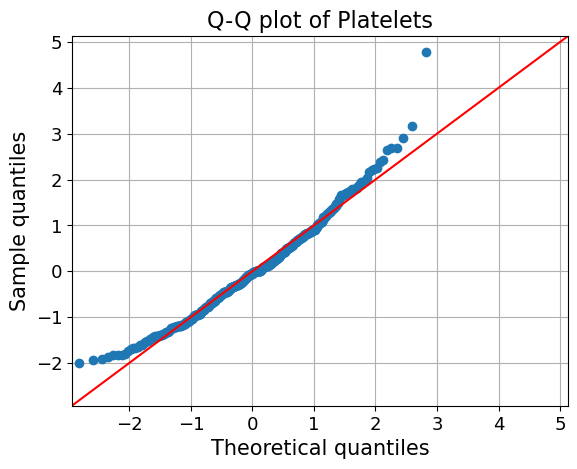

<Figure size 800x500 with 0 Axes>

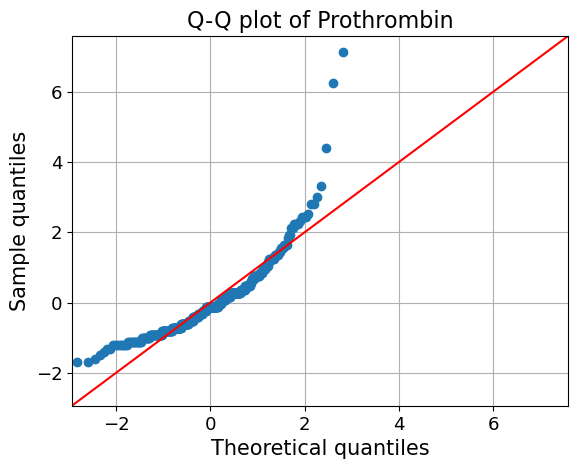

In [10]:
from statsmodels.graphics.gofplots import qqplot

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Generate Q-Q plots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data[var], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {var}', fontsize=16)
    plt.grid(True)
    plt.show()


<Axes: >

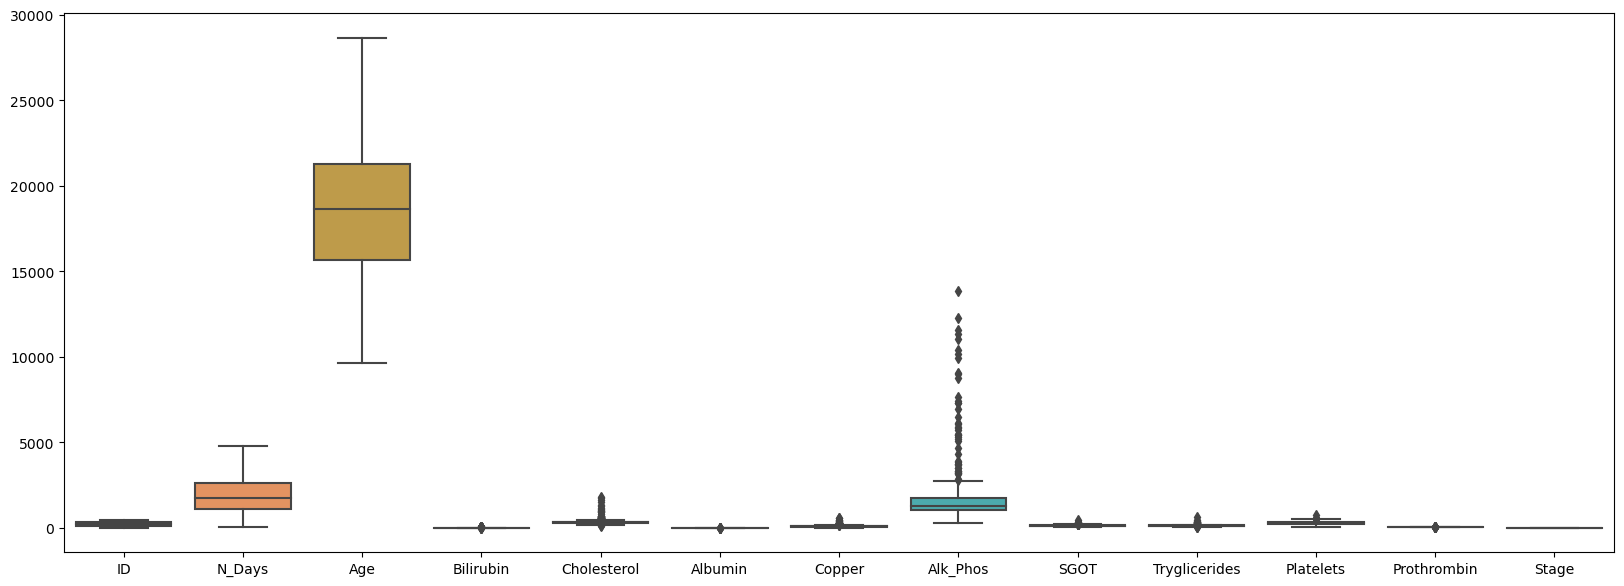

In [11]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [12]:
print(data.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [22]:
# Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create x to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

In [23]:
# data after nromalizing and feature creation
data.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0.075515,0.622822,0.512635,0.085196,0.238806,0.260274,0.105279,0.258993,0.246018,0.194234,...,False,False,True,False,True,False,True,False,False,True
1,0.937947,0.578364,0.028881,0.109970,0.813433,0.085616,0.523509,0.202298,0.097345,0.241275,...,False,True,False,False,True,False,True,True,False,False
2,0.204249,0.839597,0.039711,0.033837,0.567164,0.352740,0.016724,0.161871,0.038938,0.135053,...,True,True,False,True,False,True,False,False,True,False
3,0.396298,0.545664,0.054152,0.074924,0.216418,0.102740,0.429723,0.079554,0.104425,0.183612,...,False,True,False,False,True,False,True,False,True,False
4,0.307741,0.226748,0.111913,0.096073,0.585821,0.238014,0.028143,0.201439,0.069027,0.112291,...,False,True,False,False,True,False,True,True,False,False


<Axes: >

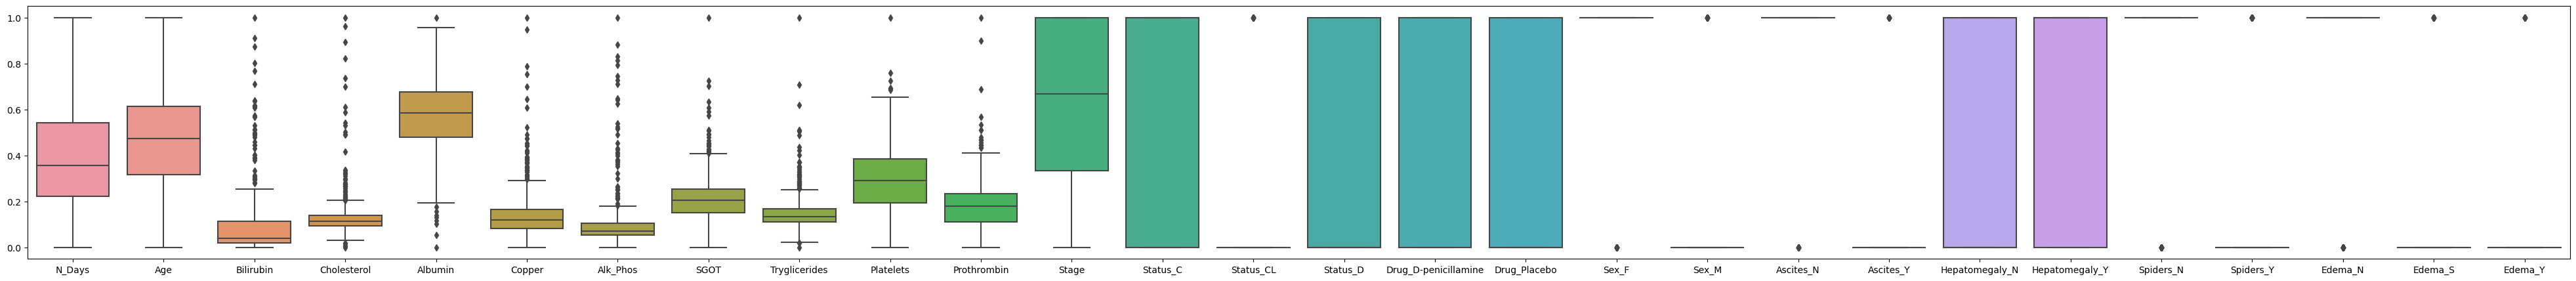

In [30]:
# Excluding 'ID' column from the data to be plotted
#data = data.drop('ID', axis=1)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(50, 5))
sns.boxplot(data=data)

In [25]:
# checking the correlation between all the features in the data
data.corr()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
N_Days,1.000000,-0.125934,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.147495,...,-0.007386,0.247090,-0.247090,0.287832,-0.287832,0.180715,-0.180715,0.271732,-0.135174,-0.264077
Age,-0.125934,1.000000,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.145948,...,0.163341,-0.183588,0.183588,-0.111522,0.111522,0.078040,-0.078040,-0.199729,0.143887,0.130074
Bilirubin,-0.403953,0.002362,1.000000,0.336882,-0.314177,0.403761,0.104675,0.392112,0.370330,-0.013347,...,-0.027652,-0.334283,0.334283,-0.234372,0.234372,-0.247932,0.247932,-0.282617,0.117552,0.307779
Cholesterol,-0.099322,-0.145054,0.336882,1.000000,-0.043022,0.145910,0.157995,0.347222,0.291750,0.158641,...,0.002405,0.038174,-0.038174,-0.064480,0.064480,-0.093853,0.093853,0.083280,-0.048577,-0.070655
Albumin,0.430829,-0.182350,-0.314177,-0.043022,1.000000,-0.209024,-0.070010,-0.180947,-0.068509,0.156384,...,0.030351,0.315648,-0.315648,0.269351,-0.269351,0.162071,-0.162071,0.275728,-0.100594,-0.320538
Copper,-0.295723,0.034519,0.403761,0.145910,-0.209024,1.000000,0.207349,0.298923,0.292236,-0.040523,...,0.222314,-0.235302,0.235302,-0.144227,0.144227,-0.288117,0.288117,-0.187719,0.034335,0.267328
Alk_Phos,0.152368,-0.060708,0.104675,0.157995,-0.070010,0.207349,1.000000,0.122071,0.186250,0.133398,...,0.038026,-0.034538,0.034538,-0.023482,0.023482,-0.086869,0.086869,-0.026758,0.008029,0.033599
SGOT,-0.187930,-0.139050,0.392112,0.347222,-0.180947,0.298923,0.122071,1.000000,0.130853,-0.094383,...,0.000706,-0.101112,0.101112,-0.091103,0.091103,-0.145465,0.145465,-0.099966,0.010176,0.154019
Tryglicerides,-0.111453,0.002323,0.370330,0.291750,-0.068509,0.292236,0.186250,0.130853,1.000000,0.088806,...,0.056923,-0.197834,0.197834,-0.083989,0.083989,-0.122999,0.122999,-0.093510,0.093166,0.023801
Platelets,0.147495,-0.145948,-0.013347,0.158641,0.156384,-0.040523,0.133398,-0.094383,0.088806,1.000000,...,-0.089539,0.167735,-0.167735,0.181538,-0.181538,0.103079,-0.103079,0.184942,-0.099434,-0.169043


<Axes: >

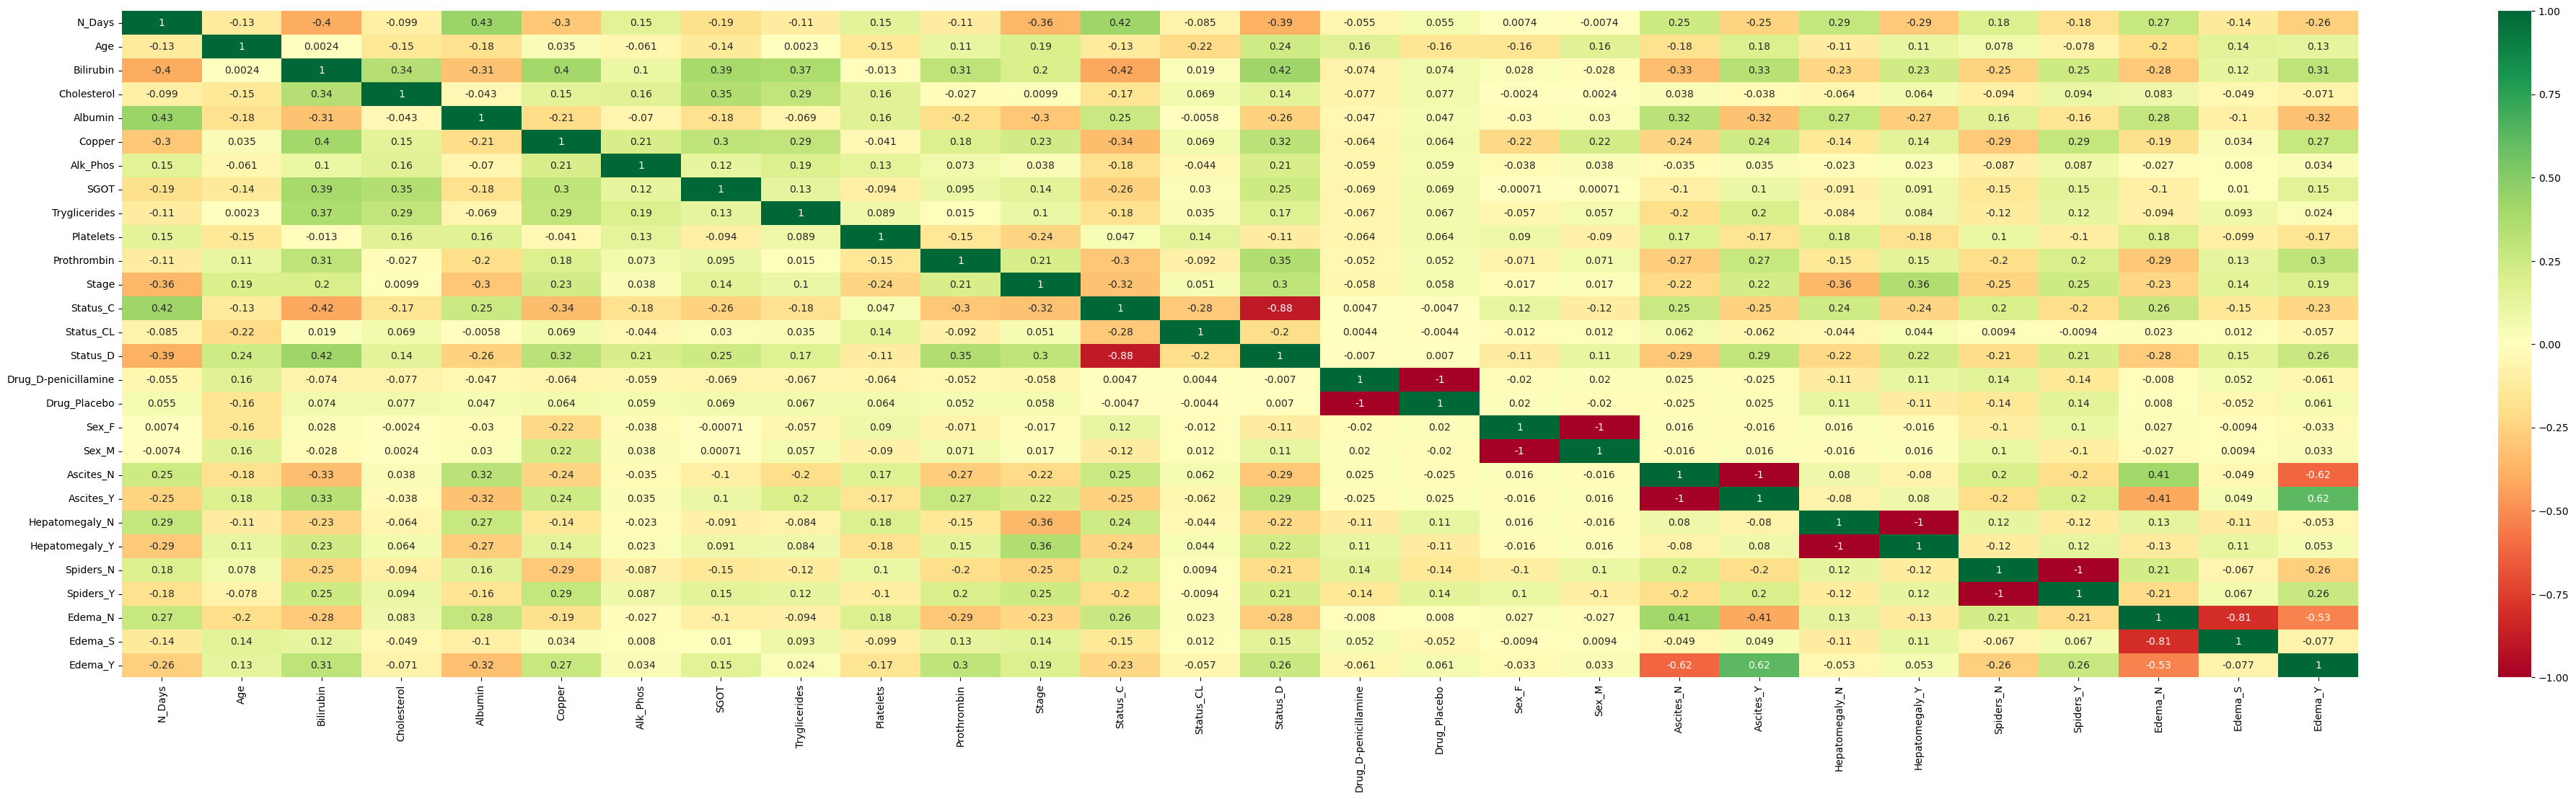

In [33]:
# the heat map of the correlation
plt.figure(figsize=(60, 12))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")